<a href="https://colab.research.google.com/github/aliyheva/Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 28.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
t=pd.read_csv(path+'/Titanic-Dataset.csv')
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Drop the unnecessary columns from dataframe

In [ ]:
t=t.drop('PassengerId',axis=1)
t=t.drop('Name',axis=1)
t=t.drop('Ticket',axis=1)
t

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


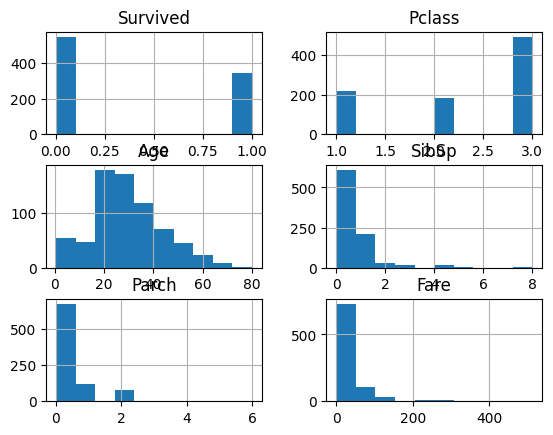

In [ ]:
t.hist();

<Axes: >

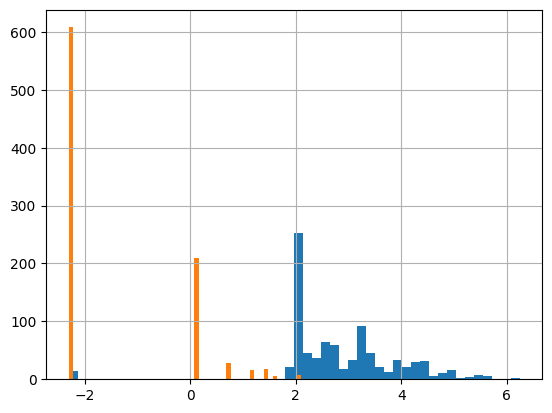

In [ ]:
np.log(t['Fare']+0.1).hist(bins=50)   #because of skewed distribution
np.log(t['SibSp']+0.1).hist(bins=50)


In [ ]:
#Look at the nulls and replace or delete them
t.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


Fill the null values

In [ ]:
t.fillna({"Age":t['Age'].median()},inplace=True)
t.fillna({"Cabin":t['Cabin'].mode()[0]},inplace=True)
t.fillna({"Embarked":t['Embarked'].mode()[0]},inplace=True)
t

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
t.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [ ]:
X=t.drop('Survived',axis=1)
y=t['Survived'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Divide data to numeric and object data for changing

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
X_num=X_train[['Fare','Age']]
X_cat=X_train[['Pclass','Sex','SibSp','Parch','Cabin','Embarked']]

In [ ]:
X_num

,Fare,Age
331,28.5000,45.5
733,13.0000,23.0
382,7.9250,32.0
704,7.8542,26.0
813,31.2750,6.0
...,...,...
106,7.6500,21.0
270,31.0000,28.0
860,14.1083,41.0
435,120.0000,14.0


In [ ]:
X_cat

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
331,1,male,0,0,C124,S
733,2,male,0,0,B96 B98,S
382,3,male,0,0,B96 B98,S
704,3,male,1,0,B96 B98,S
813,3,female,4,2,B96 B98,S
...,...,...,...,...,...,...
106,3,female,0,0,B96 B98,S
270,1,male,0,0,B96 B98,S
860,3,male,2,0,B96 B98,S
435,1,female,1,2,B96 B98,S


With encoding change objects to numeric data

In [ ]:
from sklearn.preprocessing import OneHotEncoder   #object to numeric
encoder=OneHotEncoder()
encoder.fit_transform(X_cat).toarray()
X_cat=pd.DataFrame(encoder.fit_transform(X_cat).toarray(),columns=encoder.get_feature_names_out())
X_cat

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
708,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
709,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Fill nulss with median of columns in imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_  #show the median of each column

array([14.4542, 28.    ])

In [ ]:
imputer.feature_names_in_  #show the name of columns

array(['Fare', 'Age'], dtype=object)

Scaling data because if data is in same size model can understand more better

In [ ]:
from sklearn.preprocessing import StandardScaler #scale data
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

,Fare,Age
0,-0.078684,1.253641
1,-0.377145,-0.477284
2,-0.474867,0.215086
3,-0.476230,-0.246494
4,-0.025249,-1.785093
...,...,...
707,-0.480162,-0.631144
708,-0.030545,-0.092634
709,-0.355804,0.907456
710,1.683201,-1.169653


Pipeline in machine learning is a way to streamline and automate the process of preparing data and applying machine learning models.

In [ ]:
from sklearn.pipeline import Pipeline
X_num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
X_num=pd.DataFrame(X_num_pipeline.fit_transform(X_num),columns=X_num.columns)
X_num

,Fare,Age
0,-0.078684,1.253641
1,-0.377145,-0.477284
2,-0.474867,0.215086
3,-0.476230,-0.246494
4,-0.025249,-1.785093
...,...,...
707,-0.480162,-0.631144
708,-0.030545,-0.092634
709,-0.355804,0.907456
710,1.683201,-1.169653


In [ ]:
X_cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])
X_cat=pd.DataFrame(X_cat_pipeline.fit_transform(X_cat),columns=X_cat_pipeline.get_feature_names_out())
X_cat

,Pclass_1_0.0,Pclass_1_1.0,Pclass_2_0.0,Pclass_2_1.0,Pclass_3_0.0,Pclass_3_1.0,Sex_female_0.0,Sex_female_1.0,Sex_male_0.0,Sex_male_1.0,...,Cabin_G6_0.0,Cabin_G6_1.0,Cabin_T_0.0,Cabin_T_1.0,Embarked_C_0.0,Embarked_C_1.0,Embarked_Q_0.0,Embarked_Q_1.0,Embarked_S_0.0,Embarked_S_1.0
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
708,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
709,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
710,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Combining the columns

In [ ]:
num_cols=['Fare', 'Age']
cat_cols=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']
from sklearn.compose import ColumnTransformer    #same the concat columns
transformer=ColumnTransformer([
    ('num',X_num_pipeline,num_cols),
    ('cat',X_cat_pipeline,cat_cols)
])
X_train_prepared=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_train_prepared

,num__Fare,num__Age,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__SibSp_0,cat__SibSp_1,cat__SibSp_2,...,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,-0.078684,1.253641,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.377145,-0.477284,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.474867,0.215086,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.476230,-0.246494,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.025249,-1.785093,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.480162,-0.631144,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
708,-0.030545,-0.092634,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
709,-0.355804,0.907456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710,1.683201,-1.169653,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_prepared.dtypes

,0
num__Fare,float64
num__Age,float64
cat__Pclass_1,float64
cat__Pclass_2,float64
cat__Pclass_3,float64
...,...
cat__Cabin_G6,float64
cat__Cabin_T,float64
cat__Embarked_C,float64
cat__Embarked_Q,float64


In [ ]:
X_train_prepared.isna().sum()

,0
num__Fare,0
num__Age,0
cat__Pclass_1,0
cat__Pclass_2,0
cat__Pclass_3,0
...,...
cat__Cabin_G6,0
cat__Cabin_T,0
cat__Embarked_C,0
cat__Embarked_Q,0


Full Code:

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
full_pipeline=make_pipeline(transformer,Lasso(alpha=1.0))
full_pipeline.fit(X_train,y_train)
X_test_prepared = pd.DataFrame(transformer.transform(X_test), columns=transformer.get_feature_names_out())
full_pipeline.score(X_test,y_test)


-0.005646334288551325

In [ ]:
from sklearn.linear_model import Ridge
full_pipeline=make_pipeline(transformer,Ridge(alpha=1.0))
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)


0.41262574712907296

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
full_pipeline=make_pipeline(transformer,LogisticRegression())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.7988826815642458

In [ ]:
full_pipeline.predict(X_test[:5])

array([0, 0, 0, 1, 1])

In [ ]:
y_test[:5]

,Survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
full_pipeline=make_pipeline(transformer,DecisionTreeClassifier())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.770949720670391

In [ ]:
from sklearn.ensemble import RandomForestClassifier
full_pipeline=make_pipeline(transformer,RandomForestClassifier())
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.776536312849162

In [ ]:
full_pipeline.predict(X_test[:5])

array([0, 0, 0, 1, 0])

In [ ]:
y_test[:5]

,Survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
for i in range(1,100,20):
    forest_reg=RandomForestClassifier(n_estimators=i,random_state=42)
    ful_pipeline=make_pipeline(transformer,forest_reg)
    ful_pipeline.fit(X_train[:5000],y_train[:5000])
    print(i,ful_pipeline.score(X_test,y_test))

1 0.7821229050279329
21 0.8044692737430168
41 0.7988826815642458
61 0.7877094972067039
81 0.7821229050279329


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(full_pipeline,X_train[:5000],y_train[:5000],scoring="neg_mean_absolute_error",cv=5)
scores

array([-0.20979021, -0.24475524, -0.21126761, -0.21830986, -0.13380282])

In [ ]:
pd.Series(scores).describe()

,0
count,5.000000
mean,-0.203585
std,0.041470
min,-0.244755
25%,-0.218310
50%,-0.211268
75%,-0.209790
max,-0.133803


In [ ]:
X_train_prepared=X_train_prepared.drop('cat__Cabin_C62 C64',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_D37',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_D9',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_D11',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_D20',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_C85',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_C101',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_B79',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_B73',axis=1)
X_train_prepared=X_train_prepared.drop('cat__Cabin_C45',axis=1)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[1,21,41,61,81],
            'max_features':[1,2,4,6,8]
            }
forest_reg=RandomForestClassifier(random_state=42,n_jobs=-1)
grid_search=GridSearchCV(forest_reg,param_grid,cv=3,scoring='neg_mean_absolute_error')
grid_search.fit(X_train_prepared[:5000],y_train[:5000])

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_features': [1, 2, 4, 6, 8],
                         'n_estimators': [1, 21, 41, 61, 81]},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 81}

In [ ]:
rnd_forest=RandomForestClassifier(max_features=2,n_estimators=81,random_state=42)
full_pipeline=make_pipeline(transformer,rnd_forest)
full_pipeline.fit(X_train,y_train)
full_pipeline.score(X_test,y_test)

0.7877094972067039

In [ ]:
rnd_forest.feature_importances_

array([0.21193059, 0.19979251, 0.01687269, 0.01862526, 0.03908035,
       0.132788  , 0.10842111, 0.01371088, 0.01385936, 0.00600499,
       0.00438775, 0.00339403, 0.00142702, 0.00291423, 0.01568754,
       0.01125633, 0.01172457, 0.00253462, 0.0023293 , 0.00203408,
       0.00058001, 0.00069298, 0.00065078, 0.00056561, 0.00062133,
       0.00230982, 0.00040938, 0.00126503, 0.00070713, 0.00074927,
       0.0005436 , 0.0011813 , 0.00056726, 0.00096651, 0.00055518,
       0.00276014, 0.00092344, 0.00098185, 0.00037187, 0.00091128,
       0.00059932, 0.00100304, 0.00062441, 0.00076789, 0.00097467,
       0.00099857, 0.00047688, 0.00162267, 0.00116468, 0.00056529,
       0.00069631, 0.00102064, 0.00034524, 0.00098359, 0.00034021,
       0.00052926, 0.00074977, 0.00036677, 0.03080421, 0.00029744,
       0.00087703, 0.00195168, 0.00243393, 0.00059823, 0.00084895,
       0.00043925, 0.00103646, 0.00077989, 0.00064811, 0.00105908,
       0.00332736, 0.00086446, 0.00066766, 0.00071327, 0.00035

In [ ]:
sorted(zip(rnd_forest.feature_importances_,X_train_prepared.columns),reverse=True)

[(0.21193059214200075, 'num__Fare'),
 (0.19979251248852695, 'num__Age'),
 (0.13278799744014463, 'cat__Sex_female'),
 (0.10842111280495303, 'cat__Sex_male'),
 (0.03908034895452343, 'cat__Pclass_3'),
 (0.030804209044216102, 'cat__Cabin_C104'),
 (0.01862526108677097, 'cat__Pclass_2'),
 (0.016872688640534417, 'cat__Pclass_1'),
 (0.015687540000632414, 'cat__Parch_0'),
 (0.013859362866520456, 'cat__SibSp_1'),
 (0.013710877693243213, 'cat__SibSp_0'),
 (0.01172457230072045, 'cat__Parch_2'),
 (0.011256333611410556, 'cat__Parch_1'),
 (0.006004994232695107, 'cat__SibSp_2'),
 (0.004387748044065187, 'cat__SibSp_3'),
 (0.004266773830712474, 'cat__Cabin_C7'),
 (0.0033940260434310783, 'cat__SibSp_4'),
 (0.0033273615518606553, 'cat__Cabin_C32'),
 (0.003056219963195907, 'cat__Cabin_E8'),
 (0.0029142257805697134, 'cat__SibSp_8'),
 (0.0027601374110761095, 'cat__Cabin_B20'),
 (0.0025346214974403254, 'cat__Parch_3'),
 (0.0024901036015169318, 'cat__Embarked_C'),
 (0.002433933468457501, 'cat__Cabin_C123'),
 (

In [ ]:
from sklearn.ensemble import IsolationForest #Find the outliers
iso=IsolationForest(random_state=42)
iso.fit(X_train_prepared)
iso.predict(X_train_prepared)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train_prepared[iso.predict(X_train_prepared)==-1] #there is no any outliers

,num__Fare,num__Age,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__SibSp_0,cat__SibSp_1,cat__SibSp_2,...,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
